In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the dataset into python environment

In [2]:
#load data
data = pd.read_csv(r"C:\Users\user\Downloads\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [3]:
#making PassengerId as index column
data = pd.read_csv(r"C:\Users\user\Downloads\titanic_dataset.csv",index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.shape

(891, 11)

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#find null entries
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

there are null entries in Age,Cabin,Embarked

# 4. Fill in all the missing values present in all the columns in the dataset

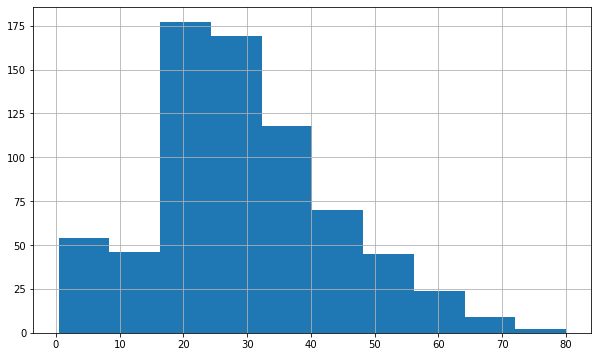

In [8]:
#plot Age
freqgraph = data['Age']
freqgraph.hist(figsize=(10,6))
plt.show()

In [9]:
#From graph, we can understand that it is left skewed. so fill null entries with median

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
#Embarked is of type object. So fill null entries with Mode

In [12]:
import statistics as st
mode_embarked = st.mode(data['Embarked'])
data['Embarked']=data['Embarked'].fillna(mode_embarked)
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [13]:
mode_embarked

'S'

In [14]:
#Cabin is having huge number of null entries. So drop it
data.drop(['Cabin'],axis=1,inplace=True)

In [15]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

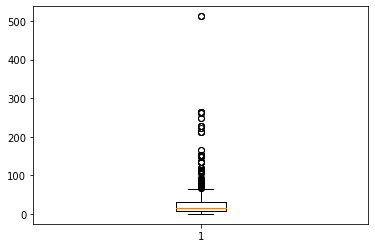

In [17]:
#plot Fare
plt.boxplot(data["Fare"])
plt.show()

In [18]:
#find quartiles
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

Q1:  7.9104 
Q2:  14.4542 
Q3:  31.0


In [19]:
#find IQR
IQR = Q3 - Q1
print('IQR: ',IQR)

IQR:  23.0896


In [20]:
#find Upper and lower limits
low_lmt = Q1-1.5*IQR
upp_lmt= Q3+1.5*IQR
print("Lower limit is : ",low_lmt)
print("Upper limit is : ",upp_lmt)

Lower limit is :  -26.724
Upper limit is :  65.6344


In [21]:
# outliers
outliers = []
for i in data['Fare']:
    if((i>upp_lmt)or(i<low_lmt)):
      outliers.append(i)

In [22]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [23]:
pd.Series(outliers).count()

116

In [24]:
#Outliers that are below lower limit
ind_fare_low = data['Fare']<low_lmt
index_fare_low = data.loc[ind_fare_low].index
index_fare_low

Int64Index([], dtype='int64', name='PassengerId')

In [25]:
#Outliers that are above upper limit
ind_fare = data['Fare']>upp_lmt
index_fare = data.loc[ind_fare].index
index_fare

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [26]:
#Drop the above indexes
data.drop(index_fare,inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Name      775 non-null    object 
 3   Sex       775 non-null    object 
 4   Age       775 non-null    float64
 5   SibSp     775 non-null    int64  
 6   Parch     775 non-null    int64  
 7   Ticket    775 non-null    object 
 8   Fare      775 non-null    float64
 9   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 66.6+ KB


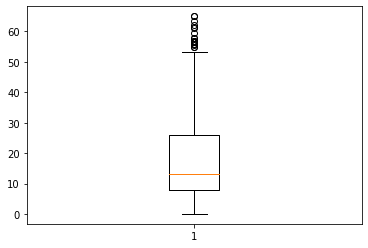

In [28]:
plt.boxplot(data["Fare"])
plt.show()

SibSp

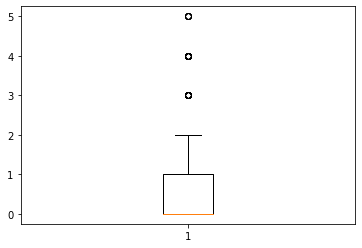

In [29]:
#plot SibSp
plt.boxplot(data["SibSp"])
plt.show()

In [30]:
#find quartiles
Q1_sibsp = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2_sibsp = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3_sibsp = np.percentile(data['SibSp'],75,interpolation='midpoint')
print('Q1: ',Q1_sibsp,'\nQ2: ',Q2_sibsp,'\nQ3: ',Q3_sibsp)

Q1:  0.0 
Q2:  0.0 
Q3:  1.0


In [31]:
#find IQR
IQR_sibsp = Q3_sibsp - Q1_sibsp
print('IQR: ',IQR_sibsp)

IQR:  1.0


In [32]:
#find Upper and lower limits
low_lmt_sibsp = Q1_sibsp-1.5*IQR_sibsp
upp_lmt_sibsp= Q3_sibsp+1.5*IQR_sibsp
print("Lower limit is : ",low_lmt_sibsp)
print("Upper limit is : ",upp_lmt_sibsp)

Lower limit is :  -1.5
Upper limit is :  2.5


In [33]:
# outliers
outliers_sibsp = []
for i in data['SibSp']:
    if((i>upp_lmt_sibsp)or(i<low_lmt_sibsp)):
      outliers_sibsp.append(i)

In [34]:
outliers_sibsp

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [35]:
pd.Series(outliers_sibsp).count()

36

In [36]:
#Outliers that are below lower limit
ind_sibsp_low = data['SibSp']<low_lmt_sibsp
index_sibsp_low = data.loc[ind_sibsp_low].index
index_sibsp_low

Int64Index([], dtype='int64', name='PassengerId')

In [37]:
#Outliers that are above upper limit
ind_sibsp = data['SibSp']>upp_lmt_sibsp
index_sibsp = data.loc[ind_sibsp].index
index_sibsp

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [38]:
#Drop the above indexes
data.drop(index_sibsp,inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  739 non-null    int64  
 1   Pclass    739 non-null    int64  
 2   Name      739 non-null    object 
 3   Sex       739 non-null    object 
 4   Age       739 non-null    float64
 5   SibSp     739 non-null    int64  
 6   Parch     739 non-null    int64  
 7   Ticket    739 non-null    object 
 8   Fare      739 non-null    float64
 9   Embarked  739 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 63.5+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x171cbe4d790>,
 'caps': [<matplotlib.lines.Line2D at 0x171cbe4de50>,
 'boxes': [<matplotlib.lines.Line2D at 0x171cbe4d430>],
 'medians': [<matplotlib.lines.Line2D at 0x171cbe5b550>],
 'fliers': [<matplotlib.lines.Line2D at 0x171cbe5b8b0>],
 'means': []}

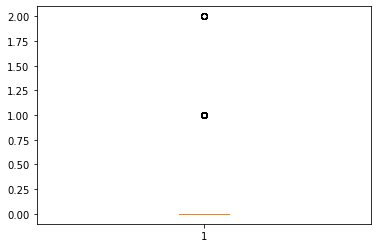

In [40]:
plt.boxplot(data["SibSp"])

Parch

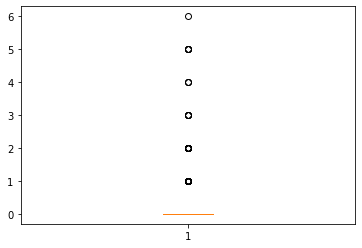

In [41]:
#plot Parch
plt.boxplot(data["Parch"])
plt.show()

In [42]:
Q1_parch = np.percentile(data['Parch'],25,interpolation='midpoint')
Q2_parch = np.percentile(data['Parch'],50,interpolation='midpoint')
Q3_parch = np.percentile(data['Parch'],75,interpolation='midpoint')
print('Q1: ',Q1_parch,'\nQ2: ',Q2_parch,'\nQ3: ',Q3_parch)

Q1:  0.0 
Q2:  0.0 
Q3:  0.0


this indicates that there are no outliers

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

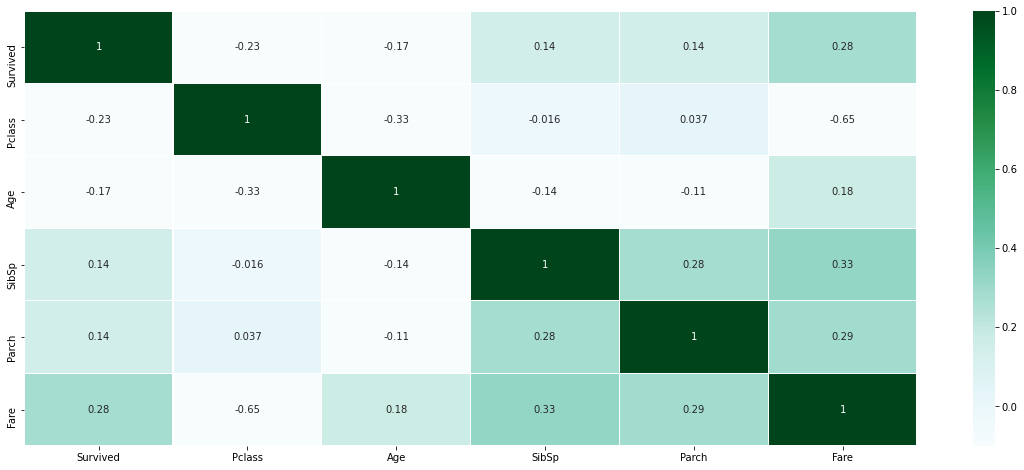

In [43]:
#finding correlation and plotting heat map
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.1,vmax=1, annot=True, linewidths=0.2,cmap="BuGn")

In [44]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [45]:
#defining x and y
x = data.drop(["Survived","Sex","Name","Ticket","Embarked"], axis = 1)
y = data["Survived"]

In [46]:
#min max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [47]:
x=min_max.fit_transform(x)

In [48]:
x=pd.DataFrame(x)

In [49]:
x.describe()

,0,1,2,3,4
count,739.000000,739.000000,739.000000,739.000000,739.000000
mean,0.728011,0.366928,0.137348,0.047812,0.264196
std,0.371458,0.154294,0.253189,0.125609,0.206543
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.283740,0.000000,0.000000,0.121410
50%,1.000000,0.346569,0.000000,0.000000,0.176923
75%,1.000000,0.425107,0.000000,0.000000,0.398911
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#performing linear regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 0.18525464543648504
R2: 0.17974171141282236


In [52]:
data.shape

(739, 10)